## Taylor Series, Gradient Decent, Newton-Raphson, Jacobian Matrix, Hessian Matrix, etc.

1. Taylor Series
$$
f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2}(x - x_0)^2 + \cdots
$$

2. Gradient Decent

Usually, the gradient decent method is used to find the minimum of a function.
Let's say we have a function $f(x)$, and we want to find the value of $x$ that minimizes this function at next step.
Thus, we want $f(x_0 + \Delta x) < f(x_0)$, then from Taylor Series with the first order term, we have
$$
f(x) = f(x_0) + f'(x_0)(x - x_0)
$$
$$
f(x_0 + \Delta x) = f(x_0) + f'(x_0)\Delta x
$$
If we want $f(x_0 + \Delta x) < f(x_0)$, then we need
$$
f'(x_0)\Delta x < 0
$$
And, $f'(x_0)$ is the gradient of $f$ at $x_0$, which is a determined value.
Thus, we can let $\Delta x = -\eta f'(x_0)$ to make $f(x_0 + \Delta x) < f(x_0)$, where $\eta$ is a constant step size.
So, we finally get the update rule of Gradient Decent:
$$
x_{n+1} = x_n - \eta f'(x_n)
$$

3. Newton-Raphson for finding root
Newton-Raphson is originally used to solve the algebraic equation $f(x) = 0$.
Let's say we have a function $f(x)$, and we want to find the value of $x$ that satisfies $f(x) = 0$.
From Taylor Series with the first order term, we have
$$
f(x) = f(x_0) + f'(x_0)(x - x_0)
$$
If we want $f(x) = 0$, then we have
$$
x = x_0 - \frac{f(x_0)}{f'(x_0)}
$$
Thus, we can get the update rule of Newton-Raphson:
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

We can see that the Newton-Raphson method has similar form as Gradient Decent, but with a different update rule.
This is because they are trying to solve different problems with same principle.

We can also think the finding root of $f(x) = 0$ as a minimization problem, where we want to minimize new function $g(x) = f(x)^2$, and we can get the update rule of Newton-Raphson as the gradient decent method.
$$
g(x) = f(x)^2
$$
$$
g'(x) = 2f(x)f'(x)
$$
$$
x_{n+1} = x_n - \eta 2f(x_n)f'(x_n)
$$

Compare the update rule of Newton-Raphson and Gradient Decent, we can find that they are the same if we let $\eta = \frac{1}{2 * f'(x_n)^2}$.

4. Newton-Raphson for convex optimization
Newton-Raphson is also used in convex optimization, where we want to find the minimum of a convex function $f(x)$.
Let's say we have a convex function $f(x)$, and we want to find the value of $x$ that minimizes this function at next step.
For convex function, the problem is equivalent to finding the root of $f'(x) = 0$.
Then, we can use the Newton-Raphson method to solve this problem.
$$
x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}
$$

In [54]:
# Gradient Decent
def gradient_decent_for_minimization(f, df, x0, eta=0.2, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        print(f"Iteration {i}: x = {x}")
        if abs(df(x)) < tol:
            break
        x = x - eta * df(x)
    return x

def newton_raphson_for_finding_root(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        print(f"Iteration {i}: x = {x}")
        fx = f(x)
        if abs(fx) < tol:
            break
        x = x - fx / df(x)
    return x

def gradient_decent_for_finding_root(g, dg, x0, eta=0.2, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        print(f"Iteration {i}: x = {x}")
        if abs(dg(x)) < tol:
            break
        x = x - eta * dg(x)
    return x

def gradient_decent_for_finding_root_mimic_newton_raphson(f, df, g, dg, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        print(f"Iteration {i}: x = {x}")
        if abs(dg(x)) < tol:
            break
        eta = 1/2/(df(x)**2)
        x = x - eta * dg(x)
    return x

def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2

def g(x):
    return f(x)**2

def dg(x):
    return 2*f(x)*df(x)

x0 = 2

In [ ]:
print("Gradient Decent for Minimization:")
print(gradient_decent_for_minimization(f, df, x0))

In [ ]:
print("Newton-Raphson for Finding Root:")
print(newton_raphson_for_finding_root(f, df, x0))

In [ ]:
print("Gradient Decent for Finding Root large step size:")
print(gradient_decent_for_finding_root(g, dg, x0, eta=0.01))

In [ ]:
print("Gradient Decent for Finding Root small step size:")
print(gradient_decent_for_finding_root(g, dg, x0, eta=0.006))

In [ ]:
print("Gradient Decent for Finding Root mimic Newton-Raphson:")
print(gradient_decent_for_finding_root_mimic_newton_raphson(f, df, g, dg, x0))


## SAS and PowerSAS.m: The Story

1. What are Semi-Analysical Solutions (SAS)?

Semi-analytical solutions (SAS) is a family of computational methods that uses certain analytical formulations (e.g., power series, fraction of power series, continued fractions) to approximate the solutions of mathematical problems. In terms of formulation, they are quite different from the commonly used numerical approaches e.g., Newton-Raphson method for solving algebraic equations, Runge-Kutta and Trapezoidal methods for solving differential equations. The parameters of SAS still need to be determined through some (easier and more robustness-guaranteed) numerical computation, and thus these methods are called semi-analytical.

Key Aspects of SAS:

Analytical Formulation: SAS utilizes a partially symbolic approach, where certain parts of the equation or system are treated analytically (e.g., through a power series or other forms).

Numerical Computation: To complete the solution, numerical methods are applied to find specific values for parameters or to handle parts of the problem that are too complex for pure analytical solutions.

Different from Pure Numerical Methods: While traditional methods like the Newton-Raphson for algebraic equations or Runge-Kutta for differential equations are purely numerical, SAS combines symbolic methods with numerical techniques.

Advantages: SAS offers more robustness and accuracy compared to purely numerical methods in certain cases because the problem is simplified analytically before applying computational methods. It may also require less computational effort than brute-force numerical solutions.


### Power flow equation
$$
S_i = V_i \sum_{k=0}^{n} \left[ Y_{eq}^* \right]_{ik} V_k^*
$$

This has $n$ equations and $2n$ variables for $\{S\}$ and $\{V\}$.

Write it in real and imaginary parts:
$$
\{S\} = \{P\} + j\{Q\}
$$
$$
\{V\} = \{U\} \odot \{e^{j\theta}\}
$$
$$
[Y_{eq}] = [G] + j[B] = [Y] \odot \{e^{j\phi}\}
$$

Then, we have:
$$
P_i + jQ_i = \sum_{k=0}^{n} \overline{Y}_{ik} U_i U_k e^{j\left( \theta_i - \theta_k - \phi_{ik} \right)}
$$

This has $2n$ equations and $4n$ variables for $\{P\}$, $\{Q\}$, $\{U\}$, and $\{\theta\}$.

Now we can update $U_g$ and $\theta_g$ by the following rule (Newton-Raphson method):

$$
\begin{bmatrix} 
U_g \\
\theta_g \\
\end{bmatrix}
\leftarrow 
\begin{bmatrix} 
U_g \\
\theta_g \\
\end{bmatrix}
- [J]^{-1} 
\begin{bmatrix} 
P_g \\ 
Q_g 
\end{bmatrix}
- 
\begin{bmatrix} 
P \\ 
Q 
\end{bmatrix}
$$

Where J is the Jacobian matrix and subscript $g$ means the guess of the solution:

$$
J = 
\begin{bmatrix}
\frac{\partial P}{\partial U} & \frac{\partial P}{\partial \theta} \\
\frac{\partial Q}{\partial U} & \frac{\partial Q}{\partial \theta}
\end{bmatrix}
$$

Drawbacks of Newton-Raphson:

- Sensitive to the initial guess
- No convergence guarantee
- Reevaluating Jacobian matrix every iteration

## Alternative Method to Newton-Raphson

### FDPF Method (Fast Decoupled Power Flow)

In the limit $\theta \rightarrow 0$ and $\phi \rightarrow -\frac{\pi}{2}$ (only reactance), we have:
$$
[J] \rightarrow 
\begin{bmatrix}
\frac{\partial P}{\partial U} & \frac{\partial P}{\partial \theta} \\
\frac{\partial Q}{\partial U} & \frac{\partial Q}{\partial \theta}
\end{bmatrix}
\rightarrow
\begin{bmatrix}
0 & \frac{\partial P}{\partial \theta} \\
\frac{\partial Q}{\partial U} & 0
\end{bmatrix}
$$

Thus, in Newton-Raphson, we only need to solve a linear system with a $2n \times 2n$ matrix for each iteration.
In FDPF, we only need to solve 2 linear systems with a $n \times n$ matrix for each iteration.

### DCPF Method (DC Power Flow)

In addition to the assumption of FDPF, we assume the voltage magnitude is 1.
Then, we have:
$$
[J] \rightarrow 
\begin{bmatrix}
0 & \frac{\partial P}{\partial \theta} \\
\frac{\partial Q}{\partial U} & 0
\end{bmatrix}
$$

where $\frac{\partial P_i}{\partial \theta_k} = Y_{ik}$ and $\frac{\partial Q_i}{\partial U_k} = Y_{ik}$ are diagonal matrices.

Thus, in DCPF, not only the complexity of the linear system is reduced, but also the Jacobian matrix is constant.

### Holomorphic Embedding is one of the SAS methods, and applied into power flow solution
[The Holomorphic Embedding Load Flow Method](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6344759)

[blog](https://energytransitiontwn.notion.site/016b23e2340f4f2e806b657ce3f5e180)

<!-- The power flow equation can be also be represented as:
$$
\sum_k Y_{ik} V_k = I_i^{\text{load}} + \frac{S_i^*}{V_i^*}
\tag{1}
$$

Where $I_i^{\text{load}}$ is the load current injected into bus $i$, and $S_i^*$ is the complex power injected into bus $i$ (these two reprensent the ZIP model of load).

Then, by embedding a complex number into the equation, the voltage $V_i$ is a function of the complex number $s$, we can formulate the following equation (note the equation could be any, but here is what we use and explain why we use it later)$$
$$
\sum_k Y_{ik} V_k(s) = s I_i^{\text{load}} + \frac{s S_i^*}{V_i^*(s^*)}
$$

When $s$ is zero, the equation could be solved by linear algebra and represent no load and generation case. It is just the reference voltage propogation through the network. This give us $|V_i| = 0$ and $\theta_i = 0$ for all buses. -->

We have the power flow equations:
$$
\sum^{n}_{k=1} Y_{ik}  U_k(s) = s \frac{S^*_i}{\hat U_{i}(s)} 
$$

$$
\sum^{n}_{k=1} Y^*_{ik}  \hat U_{k}(s) = s \frac{S_i}{U_{i}(s)}   
$$

Where $U(s)$ and $\hat U(s)$ are the holomorphic functions, particularly,

When $s=0$, the solution indicates the no load and generation case, which is the reference voltage propogation through the network. This give us $|U_i| = 0$ and $\theta_i = 0$ for all buses.

When $s=1$, this indicates our original power flow equation to be solved.

In addition, $U(s)$ and $\hat U(s)$ are required to have the reflection condition (could be proved to satisfy the Cauchy–Riemann equations):
$$
\{\hat{U}\}(s) = \{U^*\}(s^*)
$$

Now, we could represent the power flow voltage solution as a power series of $s$:
$$
\{U\}(s)= \sum^{\infty}_{j=0}\{a_j\}s^j
$$
$$
\{\frac{1}{\hat{U}(s)}\}= \sum^{\infty}_{j=0}\{b_j\}s^j
$$
$$
\{\hat{U}\}(s)= \sum^{\infty}_{j=0}\{c_j\}s^j
$$
$$
\{\frac{1}{U(s)}\}= \sum^{\infty}_{j=0}\{d_j\}s^j
$$

Where $a_j$, $b_j$, $c_j$, and $d_j$ are the coefficients of the power series for different buses (so vector).

Starting from the $s=0$ case (non-zero trivial high voltage solution), we have:
$$
Y_{eq} U(s) = 0 = Y_{eq} \sum^{\infty}_{j=0}\{a_j\}s^j = Y_{eq} (a_0 + a_1 s + a_2 s^2 + \cdots)
$$
Thus, we can obtain the first coefficient $a_0$ as the solution of the non-zero trivial high voltage solution $U_1$, which also gives us:
$$
a_0 = U_1
$$
$$
c_0 = U_1^*
$$
$$
a_0 * d_0 = b_0 * c_0 = 1
$$

Now, we use the exact representation of $U(s)$ and $\hat U(s)$ to match the power series of $s$ for both sides of the embedding power flow equation, and we have:
$$
Y_{ik} * (a_{0, k} + a_{1, k} s + a_{2, k} s^2 + \cdots) = s * S^*_i * (b_{0, i} + b_{1, i} s + b_{2, i} s^2 + \cdots)
$$
$$
Y_{ik}^* * (c_{0, k} + c_{1, k} s + c_{2, k} s^2 + \cdots) = s * S_i * (d_{0, i} + d_{1, i} s + d_{2, i} s^2 + \cdots)
$$
This gives:
$$
Y_{ik} * a_{1, k} = S^*_i * b_{0, i}
$$
$$
Y_{ik}^* * c_{1, k} = S_i * d_{0, i}
$$

We can solve for $a_{1, k}$ and $c_{1, k}$, and then with the reflection condition, we can solve for $b_{0, i}$ and $d_{0, i}$.

Then, we can iteratively solve for the higher order coefficients, the solution would be:
$$
\{U\}(s) = \sum^{\infty}_{j=0}\{a_j\}s^j
$$

Assign $s=1$, we can get the voltage at each bus.

And if this series converges, then the solution is the true solution.

And if the series does not converge, then the problem is not solvable or the voltage collapse happens.

Of course, it is not practical to calculate the series up to infinite terms to check the convergence. And here we can use the Padé approximant to approximate the series and check the convergence faster, and we can also check the singularity of the system by checking the poles of the rational series of the Padé approximant.

(Note, Padé approximant is from the taylor series expansion, but could be approximated far away from the point of expansion than the Taylor series. [link](https://youtu.be/szMaPkJEMrw))

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import splu

# #### HELM Method ####
# #### PQ-Bus ####

# Near-Diagonal Pade-Approximation Function
def pade(c):
    n = len(c) // 2
    m = len(c) - n
    
    # Find the Denominator Terms (Normalized)
    M_D = np.zeros((n, n), dtype=complex)
    for row_ID in range(n):
        M_D[row_ID] = np.flip(c[m + row_ID - n: m + row_ID])
    
    b = np.zeros(n + 1, dtype=complex)
    b[1:] = np.linalg.solve(M_D, -c[m:m + n])
    b /= np.linalg.norm(b)  # Normalization to avoid singularity and ill-conditioning

    # Find the Nominator Terms
    a = np.zeros(m, dtype=complex)
    for item_ID in range(m):
        for col_ID in range(item_ID + 1):
            a[item_ID] += c[item_ID - col_ID] * b[col_ID]
    
    return np.concatenate((a, b))

# Parameters
Node_Num = 10
Line_Num = 10
V_ref = 1. + 0.j
Z_ref = 0.5 + 0.j

# Conduction of Each Line
Cond = np.linspace(1. / Z_ref, 1. / Z_ref, Line_Num)

# Node-Line Information Matrix
NL = np.zeros((Line_Num, 2), dtype=int)
for line_id in range(Line_Num - 1):
    NL[line_id, 0] = line_id
    NL[line_id, 1] = line_id + 1
NL[Line_Num - 1, 0] = Line_Num - 1
NL[Line_Num - 1, 1] = 0

# Node Admittance Matrix
Y_n_trip = []
Y_n_Diag = np.zeros(Node_Num, dtype=complex)

for line_id in range(Line_Num):
    id_in = NL[line_id, 0]
    id_out = NL[line_id, 1]
    Y_n_trip.append((id_in, id_out, -Cond[line_id]))
    Y_n_trip.append((id_out, id_in, -Cond[line_id]))
    Y_n_Diag[id_in] += Cond[line_id]
    Y_n_Diag[id_out] += Cond[line_id]

# Add diagonal terms
for node_id in range(Node_Num):
    Y_n_trip.append((node_id, node_id, Y_n_Diag[node_id]))

# Construct sparse matrix
row, col, data = zip(*Y_n_trip)
Y_n = coo_matrix((data, (row, col)), shape=(Node_Num, Node_Num)).tocsc()

Y_n_small = Y_n[1:, 1:]

# Power Consumption Parameters
S_ref = 1. + 0.j
S_PQ = np.linspace(-S_ref * 0.05, -S_ref * 0.05, Node_Num - 1)

# Solution Process
power_terms = 100  # Number of Orders to be calculated
V_reg = np.zeros((Node_Num - 1, power_terms), dtype=complex)  # Coefficients for V(s)
V_hat = np.zeros((Node_Num - 1, power_terms), dtype=complex)  # Coefficients for V_hat(s)
I_reg = np.zeros((Node_Num - 1, power_terms), dtype=complex)  # Coefficients for current
I_hat = np.zeros((Node_Num - 1, power_terms), dtype=complex)

# LU Decompose of the Admittance Matrix
solver_reg = splu(Y_n_small)
solver_hat = splu(Y_n_small.conjugate())

# Trivial Solution: Solution when no current is fed to the system (open circuit solution)
I_reg_temp = V_ref * Y_n[:1, 1:].toarray().flatten()
I_hat_temp = I_reg_temp.conjugate()
V_reg_temp = solver_reg.solve(-I_reg_temp)
V_hat_temp = solver_hat.solve(-I_hat_temp)
V_reg[:, 0] = V_reg_temp
V_hat[:, 0] = V_hat_temp
I_reg[:, 0] = I_reg_temp
I_hat[:, 0] = I_hat_temp
V_reg_sum = V_reg_temp
V_hat_sum = V_hat_temp

# Linearized Solution
I_reg_temp = np.conjugate(S_PQ) / V_hat[:, 0]
I_hat_temp = S_PQ / V_reg[:, 0]
V_reg_temp = solver_reg.solve(I_reg_temp)
V_hat_temp = solver_hat.solve(I_hat_temp)
V_reg[:, 1] = V_reg_temp
V_hat[:, 1] = V_hat_temp
I_reg[:, 1] = I_reg_temp
I_hat[:, 1] = I_hat_temp
V_reg_sum += V_reg_temp
V_hat_sum += V_hat_temp

# Loop for Remainder Terms
for terms_ID in range(2, power_terms):
    I_reg_temp = np.zeros(Node_Num - 1, dtype=complex)
    I_hat_temp = np.zeros(Node_Num - 1, dtype=complex)

    for terms_ID_2 in range(1, terms_ID):
        I_reg_temp -= V_hat[:, terms_ID - terms_ID_2] * I_reg[:, terms_ID_2]
        I_hat_temp -= V_reg[:, terms_ID - terms_ID_2] * I_hat[:, terms_ID_2]

    I_reg_temp /= V_hat[:, 0]
    I_hat_temp /= V_reg[:, 0]
    V_reg_temp = solver_reg.solve(I_reg_temp)
    V_hat_temp = solver_hat.solve(I_hat_temp)
    V_reg[:, terms_ID] = V_reg_temp
    V_hat[:, terms_ID] = V_hat_temp
    I_reg[:, terms_ID] = I_reg_temp
    I_hat[:, terms_ID] = I_hat_temp
    V_reg_sum += V_reg_temp
    V_hat_sum += V_hat_temp

# Print final results
print("--------------------------------------------------")
print("Voltage by Direct Summation of Taylor Series:")
print("--------------------------------------------------")
for node_id in range(Node_Num - 1):
    print(f"Node {node_id + 1}: {abs(V_reg_sum[node_id])} p.u.")

# Pade-Approximant
V_reg_pade = np.zeros((Node_Num - 1, power_terms + 1), dtype=complex)
for node_id in range(Node_Num - 1):
    V_reg_pade[node_id, :] = pade(V_reg[node_id, :])

# Resulting Voltage
V_result_num = np.zeros(Node_Num - 1, dtype=complex)
V_result_den = np.zeros(Node_Num - 1, dtype=complex)
for terms_ID in range(power_terms // 2):
    V_result_num += V_reg_pade[:, terms_ID]
    V_result_den += V_reg_pade[:, terms_ID + power_terms // 2]
V_result_den += V_reg_pade[:, power_terms]

V_result = np.concatenate(([V_ref], V_result_num / V_result_den))

print("--------------------------------------------------")
print("Voltage by Pade Approximant:")
print("--------------------------------------------------")
for node_id in range(Node_Num - 1):
    print(f"Node {node_id + 1}: {abs(V_result[node_id + 1])} p.u.")


### Using HE to solve DAE [paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8809250)

For an IVP in the complex domain:

$$
0 = h \left( \frac{dz(\alpha)}{d\alpha}, z(\alpha), \alpha \right), \quad \alpha \in \mathbb{C}, \, z(0) = z_0,
$$

where $h$ is a holomorphic (infinitely differentiable in the complex domain) function. HE solves $z$ as a power series $\sum_{k=0}^{\infty} z[k] \alpha^k$, and the series converges to $z(\alpha)$ within a radius $R_z$:

$$
z(\alpha) = \sum_{k=0}^{\infty} z[k] \alpha^k, \quad |\alpha| < R_z.
$$

Then we can obtain the following operation rules:

**TABLE I**  
**Mathematical Operations and Corresponding HE**

| Operations     | Original form                     | $k$th-order HE coefficient                     |
|----------------|-----------------------------------|------------------------------------------------|
| Linear         | $a z(\alpha) + b$                | $a z[k] + b$                                   |
| Multiplication | $z_1(\alpha) \cdots z_m(\alpha)$ | $\sum_{\sum k_i = k} z_1[k_1] \cdots z_m[k_m]$ |
| Derivative     | $\frac{dz(\alpha)}{d\alpha}$     | $(k + 1) z[k + 1]$                             |

For example, define $h(\alpha) = \frac{dz(\alpha)}{d\alpha}$, then:
$$
h(\alpha) = \sum_{k=0}^{\infty} h[k] \alpha^k = \frac{d(\sum_{k=0}^{\infty} z[k] \alpha^k)}{d\alpha} = (1) z[1] + (2) z[2] \alpha + (3) z[3] \alpha^2 + ... + (k+1) z[k+1] \alpha^k + ...
$$

Thus:
$$
h[k] = (k+1) z[k+1]
$$

Considering the following example:
$$
\frac{dz_1(\alpha)}{d\alpha} = 2 z_1(\alpha) z_2(\alpha) + z_1(\alpha) \tag{7a}
$$
$$
0 = z_2(\alpha)^2 + z_1(\alpha) - 1 \tag{7b}
$$
Using the operation rule of the cofficient for HE, we have many sets of the cofficient equations, when k from 0 to inifity, now we only take the kth-order cofficient equation out as follows:
$$
(k+1) z_1[k+1] = 2 \sum_{i=0}^{k} z_1[i]z_2[k-i] + z_1[k]
$$
$$
0 = \sum_{i=0}^{k} z_2[i] z_2[k-i] + z_1[k] - f_\delta(k, 0)
$$
Where $f_\delta(i, j) = 1$ only if $i=j$, otherwise $f_\delta(i, j) = 0$.

And so, starting from $k=0$, we have:
$$
z_1[1] = 2 z_1[0] z_2[0] + z_1[0]
$$
$$
0 = z_2[0] z_2[0] + z_1[0] - 1
$$
From this, and given the initial condition $z_1[0], z_2[0]$, we can obtain $z_1[1]$, then for $k=1$, we have:
$$
2 z_1[2] = 2 (z_1[0]z_2[1] + z_1[1]z_2[0]) + z_1[1]
$$
$$
0 = (z_2[0]z_2[1] + z_2[1]z_2[0]) + z_1[1]
$$
Where, $z_2[1], z_1[2]$ are the unknows, and the original bottom nonlinear algebraic equation (could be equations if more original algebraic equations) becomes linear algebraic eqaution, we could solve it easily to obtain $z_2[1]$; the original upper differential equation becomes linear algebraic equation, we could solve it easily to obtain $z_1[2]$. Actually, these two are both linear algebraic equations, we could use mature linear algebra tools to solve them. Then, with k increase, we could obtain all the cofficients.

In [1]:
import numpy as np

# Define the maximum order for the approximation
K = 10  # Adjust as needed

# Initial conditions
z1 = np.zeros(K + 1)
z2 = np.zeros(K + 1)

# Set initial conditions
z1[0] = 0.5  # Example initial condition for z1(0)
z2[0] = np.sqrt(1 - z1[0])  # Based on equation (7b) for k=0

# Recursive function to calculate the delta function (kronecker delta)
def f_delta(i, j):
    return 1 if i == j else 0

# Iterate for each k from 0 to K-1
for k in range(K):
    # Solve for z2[k+1] using equation (7b)
    lhs = sum(z2[i] * z2[k - i] for i in range(k + 1))
    rhs = 1 - z1[k]
    z2[k + 1] = (rhs - lhs) / 2  # Linear equation for z2[k+1]

    # Solve for z1[k+1] using equation (7a)
    lhs_diff = sum(z1[i] * z2[k - i] for i in range(k + 1))
    z1[k + 1] = (2 * lhs_diff + z1[k]) / (k + 1)

# Display results
print("z1 coefficients:", z1)
print("z2 coefficients:", z2)


z1 coefficients: [ 0.5         1.20710678  1.45710678  1.13807119  0.5855542   0.15553511
 -0.0068937   0.04698951  0.18456023  0.29684052  0.3391811 ]
z2 coefficients: [ 7.07106781e-01 -5.55111512e-17 -1.03553391e-01 -1.55330086e-01
  4.07993633e-02  1.73011740e-01  2.83809712e-01  2.94924273e-01
  2.92215613e-01  2.56523338e-01  2.37756174e-01]


Time values (t): [0.         0.01111111 0.02222222 0.03333333 0.04444444 0.05555556
 0.06666667 0.07777778 0.08888889 0.1        0.11111111 0.12222222
 0.13333333 0.14444444 0.15555556 0.16666667 0.17777778 0.18888889
 0.2        0.21111111 0.22222222 0.23333333 0.24444444 0.25555556
 0.26666667 0.27777778 0.28888889 0.3        0.31111111 0.32222222
 0.33333333 0.34444444 0.35555556 0.36666667 0.37777778 0.38888889
 0.4        0.41111111 0.42222222 0.43333333 0.44444444 0.45555556
 0.46666667 0.47777778 0.48888889 0.5        0.51111111 0.52222222
 0.53333333 0.54444444 0.55555556 0.56666667 0.57777778 0.58888889
 0.6        0.61111111 0.62222222 0.63333333 0.64444444 0.65555556
 0.66666667 0.67777778 0.68888889 0.7        0.71111111 0.72222222
 0.73333333 0.74444444 0.75555556 0.76666667 0.77777778 0.78888889
 0.8        0.81111111 0.82222222 0.83333333 0.84444444 0.85555556
 0.86666667 0.87777778 0.88888889 0.9        0.91111111 0.92222222
 0.93333333 0.94444444 0.95555556 0.96666667 

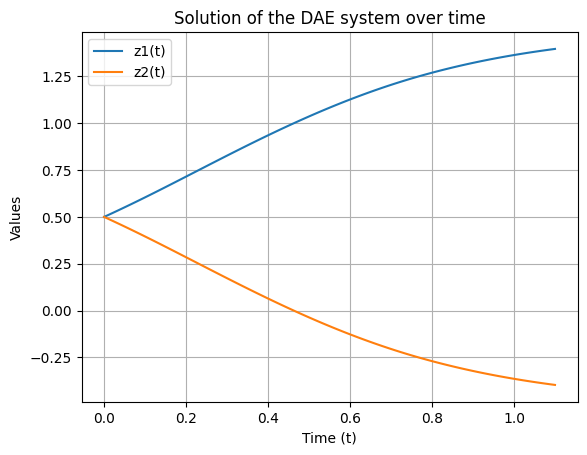

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation system
def dae_system(t, z):
    z1 = z[0]
    
    # Solve for z2 using the algebraic equation
    z2 = 1 - z1  # Positive root, assuming z1 <= 1
    
    # Define the differential equation for z1
    dz1_dt = 2 * z1 * z2 + z1
    
    # Return the derivative
    return [dz1_dt]

# Define the initial conditions for z1
z1_0 = 0.5  # Initial condition for z1
t_span = (0, 1.1)  # Time range, from 0 to 10 seconds
t_eval = np.linspace(0, 1.1, 100)  # Evaluation points

# Solve the system using SciPy's solve_ivp
solution = solve_ivp(dae_system, t_span, [z1_0], t_eval=t_eval, method='RK45')

# Extract time points and z1 values from the solution
t_vals = solution.t
z1_vals = solution.y[0]

# Compute z2 values using the algebraic equation at each time step
z2_vals = 1 - z1_vals

# Print results
print("Time values (t):", t_vals)
print("z1(t) values:", z1_vals)
print("z2(t) values:", z2_vals)

# Plotting the results
plt.plot(t_vals, z1_vals, label="z1(t)")
plt.plot(t_vals, z2_vals, label="z2(t)")
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Solution of the DAE system over time')
plt.grid()
plt.show()

z1_scipy = z1_vals
z2_scipy = z2_vals

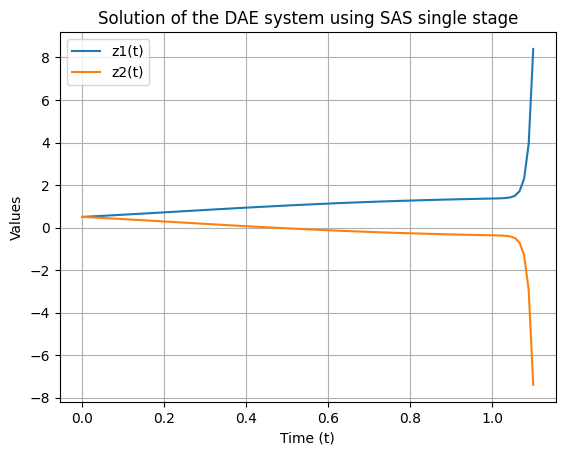

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Maximum number of coefficients to compute
K = 100

# Initialize arrays for coefficients z1 and z2
z1 = [None] * (K + 1)
z2 = [None] * (K + 1)

# Set initial conditions for k=0
z1[0] = 0.5
z2[0] = 1 - z1[0]  # From the algebraic equation

# Kronecker delta function
def f_delta(i, j):
    return 1 if i == j else 0

# Calculate coefficients recursively
for k in range(K):
    # Update z1[k+1] based on the differential equation
    z1_sum = sum(z1[i] * z2[k - i] for i in range(k + 1))
    z1[k + 1] = (2 * z1_sum + z1[k]) / (k + 1)

    # Update z2[k+1] based on the algebraic equation
    z2[k+1] = f_delta(k+1, 0) - z1[k+1]

# Display results
# print("z1 coefficients:", z1)
# print("z2 coefficients:", z2)

t_eval = np.linspace(0, 1.1, 100)  # Evaluation points
z1_vals = [sum(z1[k] * t**k for k in range(K + 1)) for t in t_eval]
z2_vals = [sum(z2[k] * t**k for k in range(K + 1)) for t in t_eval]

# Plotting the results
plt.plot(t_eval, z1_vals, label="z1(t)")
plt.plot(t_eval, z2_vals, label="z2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Values")
plt.legend()
plt.title("Solution of the DAE system using SAS single stage")
plt.grid()
plt.show()

z1_he = z1_vals
z2_he = z2_vals

In [25]:
import math
(z1[-2] / z1[-1])

-17.697269136132476

In [ ]:
# Plotting the difference between scipy and he
z1_diff = [i-j for i,j in zip(z1_scipy, z1_he)]
z2_diff = [i-j for i,j in zip(z2_scipy, z2_he)]
plt.plot(t_eval, z1_diff, label="z1(t) diff")
plt.plot(t_eval, z2_diff, label="z2(t) diff")
plt.xlabel("Time (t)")
plt.ylabel("Values")
plt.legend()
plt.title("Solution difference of the DAE system between Scipy and Holomorphic Embedding")
plt.grid()
plt.show()

The approximants of time-domain solution of DAE derived by
HE have limited convergence radius, in other words, the solution
approximately satisfies the DAE only within an interval in the
time domain. And the step length is also limited if the system hits non-smoothness (e.g. limiters, model switches).

The above result can verify that after around 1.0s, the HE diverges.

### Multi-Stage HE

To reach the desired simulation length, we use multi-stage HE, in which we substitute the power series solution back to the dae system, and check the imbalance as follows:
$$
\Delta(t) = 0 - h \left( \frac{d\tilde{z}(t)}{dt}, \tilde{z}(t), t \right)
$$
Let's define an error threshold (similar to convention iteration method, e.g. 1e-6), then let's say our simulation time is 10s, assume we calculated the power series solution, then we check the imbalance at 10s, if at 10s, the imbalance is smaller than the error threshold, then it's fine, which means our power series solution can approximate the real solution well in this simulation length; if not, then we simply check 5s, by using the binary search method, we could find the maximum simulation length for this dae system, then, we call it stage1, next, we use the value at the maximum simulation length from stage1 to be a new initial value as the next stage, then we calculate the new power series solution cofficients, and continue.

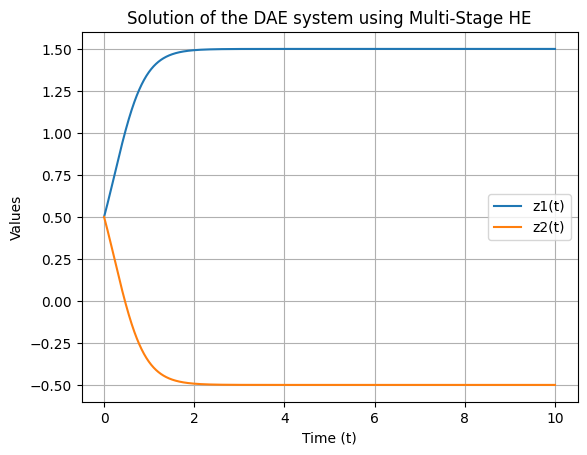

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Kronecker delta function
def f_delta(i, j):
    return 1 if i == j else 0

# Define the DAE system in HE format
def calculate_coefficients(K, z1_0, z2_0):
    """
    Calculate coefficients for z1 and z2 up to order K.
    """
    z1 = np.zeros(K + 1)
    z2 = np.zeros(K + 1)

    # Set initial conditions for k=0
    z1[0] = z1_0
    z2[0] = z2_0

    # Recursively calculate coefficients
    for k in range(K):
        # Update z1[k+1] based on the differential equation
        z1_sum = sum(z1[i] * z2[k - i] for i in range(k + 1))
        z1[k + 1] = (2 * z1_sum + z1[k]) / (k + 1)

        # Update z2[k+1] based on the algebraic equation
        z2[k+1] = f_delta(k+1, 0) - z1[k+1]

    return z1, z2

# Function to evaluate the series at a given time
def evaluate_series(z, t, K):
    return sum(z[k] * t**k for k in range(K + 1))

# Function to calculate imbalance at a given time t
def calculate_imbalance(z1, z2, t, K):
    # Evaluate the derivative of z1
    dz1_dt = sum((k + 1) * z1[k + 1] * t**k for k in range(K))
    
    # Evaluate the current values of z1 and z2
    z1_val = evaluate_series(z1, t, K)
    z2_val = evaluate_series(z2, t, K)
    
    # Calculate the DAE imbalance
    return abs(dz1_dt - (2 * z1_val * z2_val + z1_val))

# Multi-stage HE implementation
def multi_stage_HE(total_time, initial_z1, initial_z2, K, error_threshold):
    stages = []  # Store the results for each stage
    t = 0.0  # Start time

    # Loop until the entire time range is covered
    while t < total_time:
        # Compute the power series coefficients for the current stage
        z1, z2 = calculate_coefficients(K, initial_z1, initial_z2)

        # Check if the power series solution satisfies the error threshold at total_time
        if calculate_imbalance(z1, z2, total_time - t, K) < error_threshold:
            # If it does, evaluate over the entire remaining time interval
            stage_t_values = np.linspace(t, total_time, 100)
            stage_z1_values = [evaluate_series(z1, t_i - t, K) for t_i in stage_t_values]
            stage_z2_values = [evaluate_series(z2, t_i - t, K) for t_i in stage_t_values]

            stages.append((stage_t_values, stage_z1_values, stage_z2_values))
            break  # Exit the loop as we have covered the total_time

        # If the series does not satisfy the error threshold at total_time, use binary search
        left, right = t, total_time
        max_valid_t = t

        while right - left > 1e-3:  # Precision tolerance for binary search
            # Check the imbalance at the current `right` bound instead of mid-point
            imbalance = calculate_imbalance(z1, z2, right - t, K)

            if imbalance < error_threshold:
                max_valid_t = right  # Entire interval is valid
                break
            else:
                right = (left + right) / 2  # Adjust to find a shorter valid interval

        # Append the results for this stage
        stage_t_values = np.linspace(t, max_valid_t, 100)
        stage_z1_values = [evaluate_series(z1, t_i - t, K) for t_i in stage_t_values]
        stage_z2_values = [evaluate_series(z2, t_i - t, K) for t_i in stage_t_values]

        stages.append((stage_t_values, stage_z1_values, stage_z2_values))

        # Update time and initial conditions for the next stage
        t = max_valid_t
        initial_z1 = stage_z1_values[-1]
        initial_z2 = stage_z2_values[-1]

    # Concatenate the stage results
    t_values = np.concatenate([stage[0] for stage in stages])
    z1_values = np.concatenate([stage[1] for stage in stages])
    z2_values = np.concatenate([stage[2] for stage in stages])

    return t_values, z1_values, z2_values


# Define constants
K = 50  # Order of the power series
error_threshold = 1e-6  # Imbalance error threshold
total_time = 10  # Total desired simulation time

# Set initial conditions for z1 and z2
initial_z1 = 0.5
initial_z2 = 1 - initial_z1

# Solve the DAE using multi-stage HE
t_values, z1_values, z2_values = multi_stage_HE(total_time, initial_z1, initial_z2, K, error_threshold)

# Plot the results
plt.plot(t_values, z1_values, label="z1(t)")
plt.plot(t_values, z2_values, label="z2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Values")
plt.legend()
plt.title("Solution of the DAE system using Multi-Stage HE")
plt.grid()
plt.show()


Now, with the multi-stage HE, we could have expand the simulation length well.

Question: why we have to use this binary search to check if the solution diverges or not?

Thought: according to the definition of the convergence of the power series, we have
$$
|\frac{a_n}{a_{n-1}} x| < 1
$$
Ignore the sign, we bascially have $x < \frac{a_{n-1}}{a_n}$, however, in our case, we can not determine the convengence radius until we calculate all the cofficients (which is infinite, impossible), and so we may only use the binary search with evaluation method to check if the solution is in satifisied with the error threshold.

Question: The difference between conventional numerical integration method and SAS?

Thought: Both of them rely on the Taylor Series, we know that Taylor Series could represent any function at a point, however, usually we use the trunced version, but in this case, for some far points, the approximation is not accurate anymore, and the conventional numerical integration methods usually take a small step and approximate the derivtaves by discrite difference. To some degree, this is converting the continus derivate to discrete difference for the application of Taylor Series. However, for SAS, we first write down the exact solution in power series (the general representation of Taylor Series), in which the series cofficients are corresponding to the cofficient of Taylor Series as follows:

Taylor Series expansion on $x_0$ (note, if we use infinite order, this is exact, if only few orders, then only approximation around the point $x_0$)
$$
f(x) = x_0 + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + ... + \frac{f^n(x_0)}{n!}(x-x_0)^n
$$

General Power Series exapnsion on any point (note, if we use infinite order, this is exact, if only few orders, then only approximation around somepoint):
$$
f(x) = a_0 + b_0 x + b_1 x^2 + ... + b_n x^n
$$

If we match term by term, we could see that the cofficients of the general power series expansion is determined by the taylor series expansion cofficients (the corresponding derivatives).

Thus, in SAS, what it does is actually still trying to approximate the solution in some orders of the series, but not calculate the derivatives (the series cofficients) in the discrete manner, it keeps the original continuous manner through the introduced operation rule with series addition, multiplication, and derivatives, recursively starting from cofficient $a_0$

In this sense, we use the polynomial power series to represent the function and than use the continuous operation rule for derivatives on it, this is computer algebra or symbolic computing; however, to reach our final goal of a simulation with finite resources, we evaluate it up to some orders, this is numerical methods.

To me, this SAS for solving DAE is basically using power series to solve DAE.